# Flow curve plots

In [80]:
import os
import glob
import matplotlib               # type: ignore
import numpy             as np  # type: ignore
import matplotlib.pyplot as plt # type: ignore
import matplotlib.colors as mcolors
import platform
from   pathlib           import Path
import importlib
#import readFiles
import src.readFiles as readFiles

import seaborn as sns
import pandas as pd
from tqdm import tqdm
import networkx as nx
#importlib.reload(readFiles)

plt.rcParams.update({
    'figure.max_open_warning': 0,
    'text.usetex':             True,
    'text.latex.preamble':     r"\usepackage{amsmath, bm, type1cm}",  # Added \bm for bold math
    'figure.autolayout':       True,
    'font.family':             "STIXGeneral",
    'mathtext.fontset':        "stix",
    'font.size':               8,
    'axes.titlesize':          8,
    'axes.labelsize':          11,           # x and y label font size
    'axes.labelweight':        'bold',       # make axis labels bold
    'figure.titlesize':        8,
    'legend.frameon':          False,
    'legend.framealpha':       0.6,
    'legend.fancybox':         True,
    'axes.grid':               False,
    'axes.grid.axis':          'both',
    'grid.alpha':              0.2,
    'grid.linewidth':          0.4,
    'xtick.labelsize':         10,
    'ytick.labelsize':         10,
    'lines.linewidth':         1,
    'lines.markersize':        3,
    'savefig.transparent':     True,
    'savefig.pad_inches':      0.1,
    'savefig.format':          'pdf',
    'savefig.bbox':            'tight'
})

plt.rcParams['text.latex.preamble']= r"\usepackage{amsmath}"
matplotlib.rcParams['text.latex.preamble'] = r'\boldmath'

colors = ['#4a91b5', '#e68139', '#5da258', '#87629b', '#1b9e77']


if platform.system() == 'Darwin':  # macOS
    topDir = Path("/Volumes/rahul_2TB/high_bidispersity/new_data/flow_curves")
    fig_save_path = Path("/Volumes/rahul_2TB/high_bidispersity/new_data/flow_curves/figures")
elif platform.system() == 'Linux':
    topDir = Path("/media/rahul/rahul_2TB/high_bidispersity/new_data/flow_curves")
    fig_save_path = Path("/home/rahul/City College Dropbox/Rahul Pandare/CUNY/research/bidisperse_project/figures/flowcurves")
else:
    raise OSError("Unsupported OS")

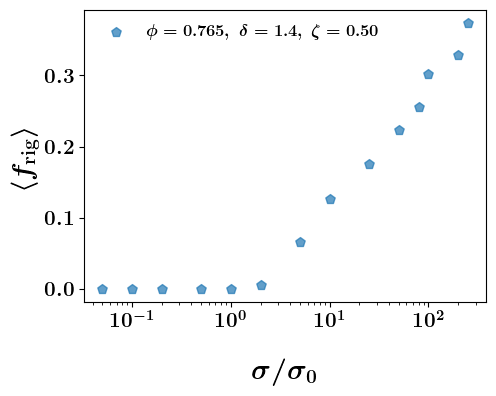

In [81]:
## Frig vs stress
# for the flow curve dataset

import os
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm  # for progress bars if needed

# Parameters
npp          = 1000
phiv         = [0.765]
arr          = [1.4]  # aspect ratios
stress_vals  = ['0.05','0.1','0.2','0.5','1','2','5','10','25','50','80','100','200','250'] 
vrr          = '0.5'
numRuns      = 1
off          = 100
pcount       = 0

colors       = ['#1f77b4', '#ff7f0e', '#2ca02c', '#444444',
                '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
                '#bcbd22', '#17becf', '#f6a821', '#f6d020',
                '#003366', '#cc6699']
marker_shape = ['p', 'D', 's', '^', 'o', '*', '+', 'x', 'H', 'v', '<', '>', '|']

fig_width  = 3.0
fig_height = 2.3

fig, ax = plt.subplots(figsize=(5,4))

# --- Case 1: Monodisperse (ar=1.0, Vr=0.25) ---
param, paramserr, zm = [], [], []

for k, phi in enumerate(phiv):
    arj   = arr[k]
    phir  = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
    param = []
    svals = []
    for ii, stress in enumerate(stress_vals):
        param_list = []
        for run in range(numRuns):
            workDir = f"{topDir}/stress_{stress}r/NP_{npp}/phi_{phir}/ar_{arj:.1f}/Vr_{vrr}/run_{run+1}/"
            #print(workDir)
            frigFile = os.path.join(workDir, "F_rig.txt")
            znetFile = os.path.join(workDir, "Z_Znet.txt")
            #print(frigFile)
            if os.path.exists(frigFile): #and os.path.exists(znetFile):
                frig = np.loadtxt(frigFile) / npp
                if len(frig) > off:
                    param_list.append(np.mean(frig[off:]))
                    
                else:
                    param_list.append(np.nan)
                    
        #svals.append(float(stress))
        param.append(np.nanmean(param_list) if param_list else np.nan)
        svals.append(float(stress) if param_list else np.nan)
    #phim_vals = [phi - phiv[0] for phi in phiv]
    #param_filtered     = [x for x in param if not np.isnan(x)]
    #phim_vals_filtered = [y for x, y in zip(param, phim_vals) if not np.isnan(x)]
    
#     print(svals)
#     print(param)
    ax.scatter(svals, param,
               marker=marker_shape[0], s=50,
               color=colors[0], alpha=0.7,
               label=fr'$\phi = {phir},\; \delta = {arj:.1f},\; \zeta = {float(vrr):.2f}$')
    pcount += 1

# --- Axis labels and formatting ---
labelfont = 20
tickfont  = 15
ax.tick_params(axis='both', labelsize=tickfont)
ax.set_xlabel(r'$\sigma/\sigma_0$', fontsize=labelfont, labelpad=20)
ax.set_ylabel(r'$\langle f_{\mathrm{rig}} \rangle$', fontsize=labelfont)
ax.legend(loc='upper left', fontsize=12, frameon=False, labelspacing=10)
ax.set_xscale('log')

fig.tight_layout()

# --- Save figure ---
if True:
    figFormat = ".pdf"
    plt.savefig(f"{fig_save_path}/frig_plot{figFormat}",
                bbox_inches="tight", pad_inches=0, dpi=800)

plt.show()

In [9]:
## checking size of int and par files

# --- Parameters ---
npp = 1000
vr = '0.5'
phi_vals = [0.765, 0.765, 0.77, 0.795]
ar_vals = [1.0, 1.4, 2.0, 4.0]
off = 100
numRun = 1

line_markers = ['o', '*', 'p', 's']
colors = ['#4a91b5', '#e68139', '#5da258', '#87629b']

stress = ['0.05', '0.1', '0.2', '0.5', '1', '2', '5', '10', '25', '50', '80', '100', '200', '250']
stress_floats = [float(s) for s in stress]

particleFile = 'par_*.dat'
interactionFile = 'int_*.dat'
rigidFile = 'rig_*.dat'

# --- Main Loop ---
for s in stress:
    for arj, phij in zip(ar_vals, phi_vals):
        path = f"{topDir}/stress_{s}r/NP_{npp}/phi_{phij}/ar_{arj}/Vr_{vr}/run_{numRun}"

        if os.path.exists(path):
            datfile = glob.glob(f"{path}/data_*.dat")[0]
            parfile = glob.glob(f"{path}/{particleFile}")[0]
            intfile = glob.glob(f"{path}/{interactionFile}")[0]

            parlist = readFiles.readParFile(open(parfile))
            intlist = readFiles.interactionsList(open(intfile))

            try:
                rigfile = glob.glob(f"{path}/{rigidFile}")[0]
                riglist = readFiles.rigList(rigfile)
                n_rigid = len(riglist)
            except Exception:
                n_rigid = 0

            # --- Summary printout ---
            print(f"✅ Stress {s}, AR={arj}, phi={phij}")
            print(f"   Particles: {len(parlist)} | Interactions: {len(intlist)} | Rigid: {n_rigid}\n")

✅ Stress 0.05, AR=1.4, phi=0.765
   Particles: 1201 | Interactions: 1201 | Rigid: 0
✅ Stress 0.05, AR=2.0, phi=0.77
   Particles: 1201 | Interactions: 1201 | Rigid: 0
✅ Stress 0.05, AR=4.0, phi=0.795
   Particles: 1201 | Interactions: 1201 | Rigid: 0
✅ Stress 0.1, AR=1.4, phi=0.765
   Particles: 1201 | Interactions: 1201 | Rigid: 0
✅ Stress 0.1, AR=2.0, phi=0.77
   Particles: 1201 | Interactions: 1201 | Rigid: 0
✅ Stress 0.1, AR=4.0, phi=0.795
   Particles: 1201 | Interactions: 1201 | Rigid: 0
✅ Stress 0.2, AR=1.0, phi=0.765
   Particles: 1201 | Interactions: 1200 | Rigid: 0
✅ Stress 0.2, AR=1.4, phi=0.765
   Particles: 1201 | Interactions: 1201 | Rigid: 0
✅ Stress 0.2, AR=2.0, phi=0.77
   Particles: 1201 | Interactions: 1201 | Rigid: 0
✅ Stress 0.2, AR=4.0, phi=0.795
   Particles: 1201 | Interactions: 1201 | Rigid: 0
✅ Stress 0.5, AR=1.0, phi=0.765
   Particles: 1201 | Interactions: 1201 | Rigid: 0
✅ Stress 0.5, AR=1.4, phi=0.765
   Particles: 1201 | Interactions: 1201 | Rigid: 0
✅ St